In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch


In [8]:
data = pd.read_csv('Reviews.csv')
data.shape

(568454, 10)

In [9]:
data = data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"})
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]
data.shape

(393931, 10)

In [11]:
data = data.dropna()
data.shape

(393917, 10)

In [49]:
import warnings
warnings.filterwarnings("ignore")                     #Ignoring unnecessory warnings

import numpy as np                                  #for large and multi-dimensional arrays
import pandas as pd

import nltk                                         #Natural language processing tool-kit

from nltk.corpus import stopwords                   #Stopwords corpus
from nltk.stem import PorterStemmer                 # Stemmer

from sklearn.feature_extraction.text import CountVectorizer          #For Bag of words
from sklearn.feature_extraction.text import TfidfVectorizer          #For TF-IDF
from gensim.models import Word2Vec 

In [13]:
#basic cleaning
import time

data = data.drop_duplicates(subset = {"UserId","ProfileName","Time","Text"})
data = data[data['HelpfulnessNumerator'] <= data['HelpfulnessDenominator']]

nltk.download('stopwords')

stop = set(stopwords.words('english'))

#removing spaces and stopwords
import re
# function to clean data
def clean_data(X):
    temp =[]
    snow = nltk.stem.SnowballStemmer('english')
    start = time.time()
    for i, sentence in enumerate(X):
        if i%10000 == 0:
            print(i, 'Time taken:', time.time()-start)
            start = time.time()
        sentence = sentence.lower()                 # Converting to lowercase
        cleanr = re.compile('<.*?>')
        sentence = re.sub(cleanr, ' ', sentence)        #Removing HTML tags
        sentence = re.sub(r'[?|!|\'|"|#]',r'',sentence)
        sentence = re.sub(r'[.|,|)|(|\|/]',r' ',sentence)        #Removing Punctuations

        words = [snow.stem(word) for word in sentence.split()]   # Stemming
        temp.append(words)

    X = temp    

    sent = []
    for row in X:
        sequ = ''
        for word in row:
            sequ = sequ + ' ' + word
        sent.append(sequ)

    return sent

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/klejdisevdari/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
X, y = data['Text'], cleaned_data['Score']

In [14]:
y = cleaned_data['Score']

<AxesSubplot:>

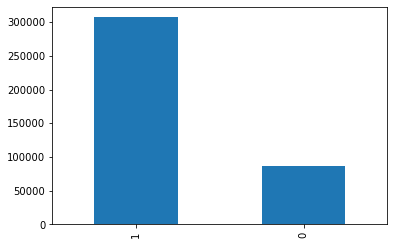

In [16]:
y[y<4] = 0 # negative class
y[y>=4] = 1 # positive class
y.value_counts().plot(kind='bar')

In [17]:
y = np.array(y) # to convert to numpy array

In [18]:
cleaned_data = clean_data(X)

0 Time taken: 1.6927719116210938e-05
10000 Time taken: 4.26750111579895
20000 Time taken: 4.606721878051758
30000 Time taken: 4.318329811096191
40000 Time taken: 4.398187637329102
50000 Time taken: 4.386837005615234
60000 Time taken: 4.6317079067230225
70000 Time taken: 4.903625011444092
80000 Time taken: 4.382453918457031
90000 Time taken: 4.531135082244873
100000 Time taken: 4.221998929977417
110000 Time taken: 4.624211072921753
120000 Time taken: 4.828066110610962
130000 Time taken: 4.346555233001709
140000 Time taken: 4.350635051727295
150000 Time taken: 4.977027893066406
160000 Time taken: 4.578828811645508
170000 Time taken: 4.368210077285767
180000 Time taken: 4.323323965072632
190000 Time taken: 4.393045902252197
200000 Time taken: 4.8498170375823975
210000 Time taken: 4.4135520458221436
220000 Time taken: 4.37319016456604
230000 Time taken: 4.6422529220581055
240000 Time taken: 4.18298077583313
250000 Time taken: 4.431384801864624
260000 Time taken: 4.50162410736084
270000 Tim

In [19]:
len(cleaned_data), len(y) # checking if the length of cleaned data and y is same

(393917, 393917)

In [9]:
cleaned_data = pd.read_csv("C:/Users/micha/Downloads/cleaned_data.csv")

In [8]:
cleaned_data

NameError: name 'cleaned_data' is not defined

# TF-IDF

In [52]:
final_tf = cleaned_data['Text']
tf_idf = TfidfVectorizer(max_features=1000)
tf_data = tf_idf.fit_transform(final_tf)
tf_data.shape

(393917, 1000)

In [53]:
temp = tf_data.toarray() # turning sparse matrix into dense matrix

In [54]:
type(temp), temp.shape

(numpy.ndarray, (393917, 1000))

In [57]:
#xgboost
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train XGBoost classifier on training data
xgb_clf.fit(X_train, y_train)

# Evaluate XGBoost classifier on test data
accuracy = xgb_clf.score(X_test, y_test)
print('Accuracy: {:.2f}%'.format(accuracy * 100))


Accuracy: 88.48%


In [55]:
torch.Tensor(temp[0:2]).shape # 2 rows and 10000 columns

torch.Size([2, 1000])

In [33]:
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(temp, y, test_size=0.2, random_state=42)

# Convert NumPy arrays to PyTorch tensors
train_data, train_labels = torch.from_numpy(train_data).float(), torch.from_numpy(train_labels).float()
test_data, test_labels = torch.from_numpy(test_data).float(), torch.from_numpy(test_labels).float()

# Create TensorDatasets for train and test sets
train_dataset = TensorDataset(train_data, train_labels)
test_dataset = TensorDataset(test_data, test_labels)

# Create DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

In [58]:
import torch.nn as nn
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(5000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 100),
            nn.ReLU(),
            nn.Linear(100, 1),
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return nn.functional.sigmoid(logits)

net = NeuralNetwork()

In [59]:
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [60]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = torch.unsqueeze(labels, 1)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        try:
            loss = criterion(outputs, labels)
        except:
            print(inputs, outputs)
        
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.547
[1,  4000] loss: 0.524
[1,  6000] loss: 0.526
[1,  8000] loss: 0.528
[1, 10000] loss: 0.520
[1, 12000] loss: 0.525
[1, 14000] loss: 0.524
[1, 16000] loss: 0.509
[1, 18000] loss: 0.491
[2,  2000] loss: 0.379
[2,  4000] loss: 0.342
[2,  6000] loss: 0.314
[2,  8000] loss: 0.300
[2, 10000] loss: 0.287
[2, 12000] loss: 0.285
[2, 14000] loss: 0.279
[2, 16000] loss: 0.278
[2, 18000] loss: 0.272
Finished Training


In [61]:
cleaned_data[0]

' i have bought sever of the vital can dog food product and have found them all to be of good qualiti the product look more like a stew than a process meat and it smell better my labrador is finicki and she appreci this product better than most'

In [78]:
sentence = ["I do like this product"]
clean_sentence = clean_data(sentence)
print(clean_sentence)
sparse = tf_idf.transform(clean_sentence)
tensor_sentence = torch.Tensor(sparse.toarray())
prob = net(tensor_sentence)
print(f'Probability of a positive review is {prob.item()}')

0 Time taken: 9.5367431640625e-07
[' i do like this product']
Probability of a positive review is 0.6198616623878479


# W2V

In [6]:
import pandas as pd
import numpy as np
import gensim
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [35]:
#Training W2V Model
sentences = [gensim.utils.simple_preprocess(text) for text in cleaned_data['Text']]
model10 = gensim.models.Word2Vec(sentences=sentences, vector_size=10, window=5, min_count=1, workers=4)

#takes around a minute or so 


In [36]:
#Text encoding
def encode_text(text):
    words = gensim.utils.simple_preprocess(text)
    vecs = [model10.wv[word] for word in words if word in model10.wv]
    if len(vecs) > 0:
        return np.mean(vecs, axis=0)
    else:
        return np.zeros(model10.vector_size)

cleaned_data['encoded_text_10'] = cleaned_data['Text'].apply(encode_text)

#takes about a minute or so 


In [18]:
cleaned_data.head

<bound method NDFrame.head of         Unnamed: 0                                               Text  Score  \
0                0   i have bought sever of the vital can dog food...      1   
1                1   product arriv label as jumbo salt peanut the ...      0   
2                2   this is a confect that has been around a few ...      1   
3                3   if you are look for the secret ingredi in rob...      0   
4                4   great taffi at a great price there was a wide...      1   
...            ...                                                ...    ...   
393912      393912   great for sesam chicken this is a good if not...      1   
393913      393913   im disappoint with the flavor the chocol note...      0   
393914      393914   these star are small so you can give 10-15 of...      1   
393915      393915   these are the best treat for train and reward...      1   
393916      393916   i am veri satisfi product is as advertis i us...      1   

         

In [39]:
#XGBOOST

for param_value in [4,5,6,7,8]: 
    #Train Test Split
    X_train, X_test, y_train, y_test = train_test_split(cleaned_data['encoded_text'], y, test_size=0.3, random_state=42)

    #Model
    xg_train = xgb.DMatrix(np.array(list(X_train)), label=y_train)
    xg_test = xgb.DMatrix(np.array(list(X_test)), label=y_test)
    param = {'max_depth': param_value, 'eta': 0.15, 'objective': 'binary:logistic'}
    model = xgb.train(param, xg_train, num_boost_round=100)


    #model eval
    y_pred = model.predict(xg_test)
    y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
    accuracy = np.mean(y_pred == y_test)
    print(f'Param Value: {param_value} Accuracy: {accuracy}')


#as this model gets more complex, we actually see it get better.... 



Param Value: 4 Accuracy: 0.8505449499052261
Param Value: 5 Accuracy: 0.8539720417005144
Param Value: 6 Accuracy: 0.8564683184402925
Param Value: 7 Accuracy: 0.8577291497427566
Param Value: 8 Accuracy: 0.8597515569997293


In [38]:
#model eval for 10-D W2V embeddings
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(cleaned_data['encoded_text_10'], y, test_size=0.3, random_state=42)
#Model
xg_train = xgb.DMatrix(np.array(list(X_train)), label=y_train)
xg_test = xgb.DMatrix(np.array(list(X_test)), label=y_test)
param = {'max_depth': 6, 'eta': 0.3, 'objective': 'binary:logistic','lambda': 1}
model = xgb.train(param, xg_train)

y_pred = model.predict(xg_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

#default params, depth 6 eta 0.3, lambda = 1
#vector size 10 
#80% accurate 


Accuracy: 0.8001455456268616


In [41]:
y_test

23323     1
87124     0
267273    1
15891     0
77780     1
         ..
288031    1
155240    1
372046    1
369023    1
349286    1
Name: Score, Length: 118176, dtype: int64

In [ ]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import numpy as np

# define your data and labels
X = cleaned_data['encoded_text']
y = y

# define the parameter space to search over
param_dist = {
    'learning_rate': np.arange(0.05, 0.31, 0.05),
    'max_depth': np.arange(6,10, 1),
    'subsample': np.arange(0.5, 1.0, 0.1)
}

# create an instance of the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# create a random search object
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=10,  # number of iterations
    cv=5,  # number of cross-validation folds
    scoring='roc_auc',  # evaluation metric
    n_jobs=-1,  # use all available CPUs
    verbose=3  # display progress messages
)

# run the random search
random_search.fit(X, y)

# print the best parameters and score
print("Best parameters:", random_search.best_params_)
print("Best ROC AUC score:", random_search.best_score_)



In [ ]:
#tuning
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_breast_cancer

# Define X and y
X = cleaned_data['encoded_text']
y = y

# Define parameter grid
param_grid = {
    'max_depth': [3, 4, 5,6],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200, 300]
}

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Define GridSearchCV object
grid_search = GridSearchCV(
    xgb_clf, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy', 
    n_jobs=-1
)

# Fit GridSearchCV object to data
grid_search.fit(X, y)

# Print best parameters and score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)


# N-Grams


This shit runs out of memory oops

In [46]:
from sklearn.feature_extraction.text import CountVectorizer

# Encode documents using 2-grams
vectorizer = CountVectorizer(ngram_range=(2, 2))
encoded_documents = vectorizer.fit_transform(cleaned_data['Text'])


# Define CountVectorizer with n-gram range
vectorizer = CountVectorizer(ngram_range=(1,2))

# Fit and transform text data
X = vectorizer.fit_transform(cleaned_data['Text'])

# Convert sparse matrix to array
X = np.array(X.toarray())

# Print feature names
print(vectorizer.get_feature_names())


MemoryError: Unable to allocate 7.19 TiB for an array with shape (393917, 2508978) and data type int64

In [ ]:
#XGBOOST4
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Define X and y
X = X
y = y

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define XGBoost classifier
xgb_clf = xgb.XGBClassifier()

# Train XGBoost classifier on training data
xgb_clf.fit(X_train, y_train)

y_pred = model.predict(xg_test)
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8597515569997293


# Glove


In [ ]:
#for this one I don't think we can stem ... 

In [47]:
from gensim.models import KeyedVectors

# Load GloVe embeddings
glove_model = KeyedVectors.load_word2vec_format('/path/to/glove.6B.100d.txt', binary=False)

# Get embedding vector for a word
embedding_vector = glove_model['word']


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/glove.6B.100d.txt'